In [1]:
# imports and setup 

import pandas as pd
import numpy as np

from sklearn import tree, svm, metrics
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, KFold
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 6)
plt.style.use('ggplot')

Part 1: Task 1.1

In [2]:
digits = load_digits()
X = scale(digits.data)
y = digits.target
print(type(X))

n_samples, n_features = X.shape
n_digits = len(np.unique(digits.target))
print("n_digits: %d, n_samples %d, n_features %d" % (n_digits, n_samples, n_features))

<class 'numpy.ndarray'>
n_digits: 10, n_samples 1797, n_features 64


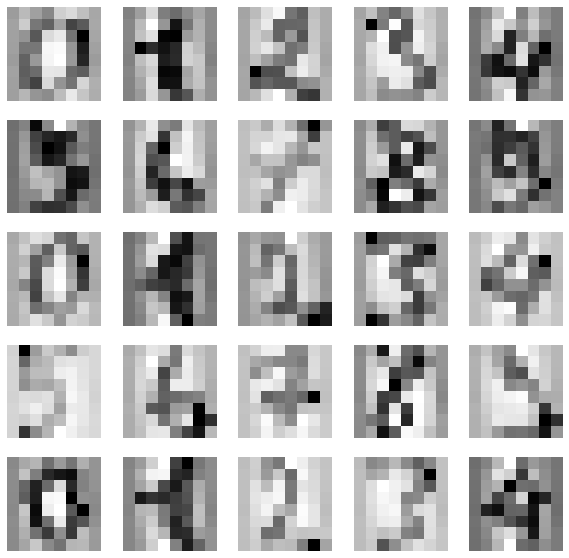

In [3]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(25):
    plt.subplot(5, 5, ii+1)
    plt.imshow(np.reshape(X[ii,:],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

In [4]:
x_train, x_test, y_train, y_test = train_test_split(X, y, random_state=1, test_size=0.8)

In [5]:
digit_svm = svm.SVC(kernel='rbf', gamma='auto', C=100)
digit_svm.fit(x_train, y_train)

SVC(C=100, gamma='auto')

In [6]:
y_pred = digit_svm.predict(x_test)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_pred))

Confusion Matrix
[[130   0   0   0   0   0   0   0   0   0]
 [  0 140   4   0   0   0   0   1   4   0]
 [  0   1 134   0   0   0   0   2   5   0]
 [  0   0   3 136   0   0   0   3   4   1]
 [  0   0   0   0 140   0   0  12   0   0]
 [  0   0   0   0   0 141   1   0   1   4]
 [  0   1   0   0   0   0 144   0   1   0]
 [  0   0   0   0   0   0   0 139   0   1]
 [  0   4   0   1   0   1   0   1 126   0]
 [  0   2   0   2   0   3   1   2   2 140]]


In [7]:
print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_pred))

Accuracy =  0.952712100139082


The accuracy is very high with this model overall. The biggest mistake based on the Confusion matrix, was that it tended to misclasify 4s as 7s

In [8]:
import array as arr
import math
j = 0  
indexArray = arr.array('I', [])  
for i in range (0, y_pred.size):  
    if(y_pred[i] != y_test[i]):
        indexArray.insert(j, i)
        j = j + 1

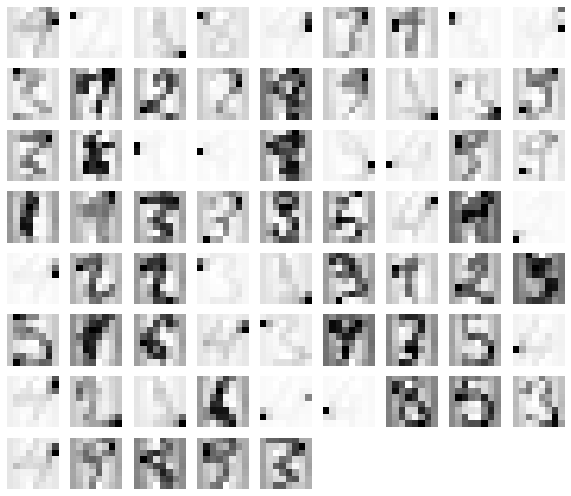

In [9]:
plt.figure(figsize= (10, 10))    
for ii in np.arange(len(indexArray)):
    plt.subplot(int(math.sqrt(j)) + 1, int(math.sqrt(j)) + 1, ii+1)
    plt.imshow(np.reshape(x_test[indexArray[ii]],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

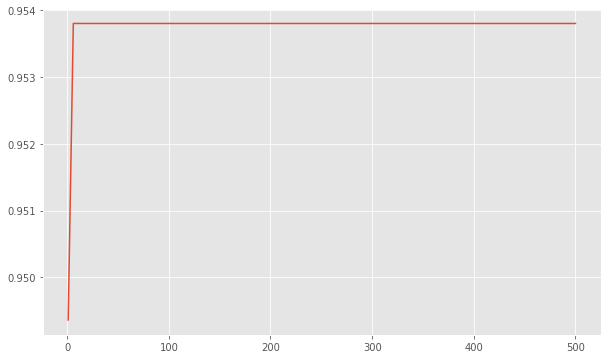

In [10]:
digit_svm.get_params()

Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    digit_svm = svm.SVC(kernel='rbf',gamma='scale', C = C)
    scores = cross_val_score(estimator = digit_svm, X = X, y = y, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

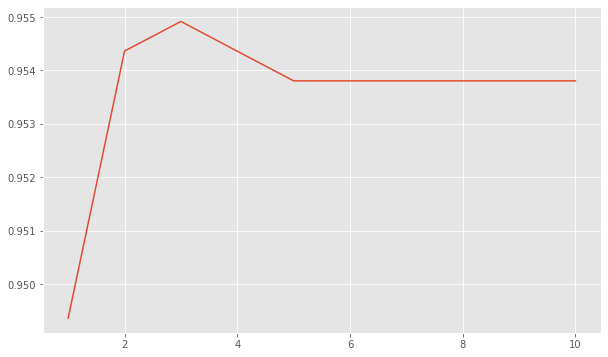

In [11]:
Cs = np.linspace(1,10,10)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    digit_svm = svm.SVC(kernel='rbf',gamma='scale', C = C)
    scores = cross_val_score(estimator = digit_svm, X = X, y = y, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

The best value of C according to this cross validation is about 3

In [12]:
# This reassignment of X to unscaled data ensures I can rerun the above code using the unscaled X data instead
X = digits.data

Using unscaled digits results in the a drastic decrease in accuracy (Accuracy =  0.11821974965229486) due to the confusion matrix showing classification of many of the digits as 0s. 

Part 2: Task 1.2

In [13]:
k = 10
clf = KNeighborsClassifier(n_neighbors=k)
clf.fit(x_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [14]:
print("Confusion matrix:")
y_predKNN = clf.predict(x_test)
print(metrics.confusion_matrix(y_true = y_test, y_pred = y_predKNN))

print('Accuracy = ', metrics.accuracy_score(y_true = y_test, y_pred = y_predKNN))

Confusion matrix:
[[130   0   0   0   0   0   0   0   0   0]
 [  0 137  11   0   0   0   0   0   1   0]
 [  2   4 123   2   0   0   0   2   9   0]
 [  1   0   1 133   0   1   0   6   4   1]
 [  0   0   0   0 147   0   0   4   1   0]
 [  1   1   0   2   1 136   1   0   0   5]
 [  0   2   0   0   0   0 143   0   1   0]
 [  0   0   0   0   0   0   0 139   1   0]
 [  0   9   1   6   0   0   0   1 115   1]
 [  5  10   0   5   1   3   2   9   8 109]]
Accuracy =  0.9123783031988874


This model is accurate (~91% accuracy with classification. The most common mistake it made according to the confusion matrix was classifying 2s as 9s. 

In [15]:
j = 0
indexArray = arr.array('I', [])
for i in range (0, y_predKNN.size):
    if(y_predKNN[i] != y_test[i]):
        indexArray.insert(j, i)
        j = j + 1

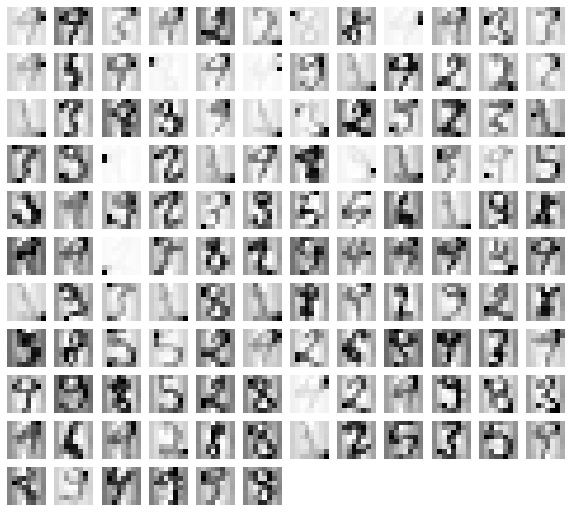

In [16]:
plt.figure(figsize= (10, 10))
for ii in np.arange(len(indexArray)):
    plt.subplot(int(math.sqrt(j)) + 1, int(math.sqrt(j)) + 1, ii+1)
    plt.imshow(np.reshape(x_test[indexArray[ii]],(8,8)), cmap='Greys',interpolation='nearest')
    plt.axis('off')
plt.show()

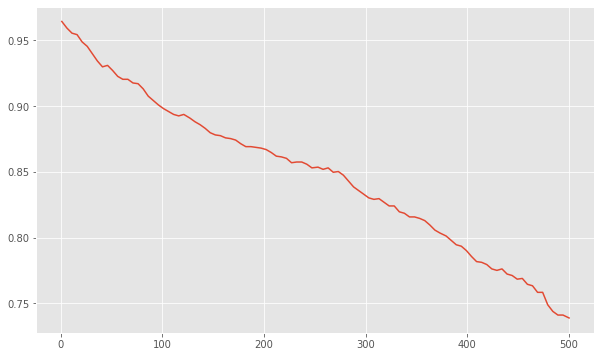

In [17]:
Cs = np.linspace(1,500,100, dtype=int)
Accuracies = np.zeros(Cs.shape[0])
for i,k in enumerate(Cs): 
    digit_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator = digit_clf, X = X, y = y, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

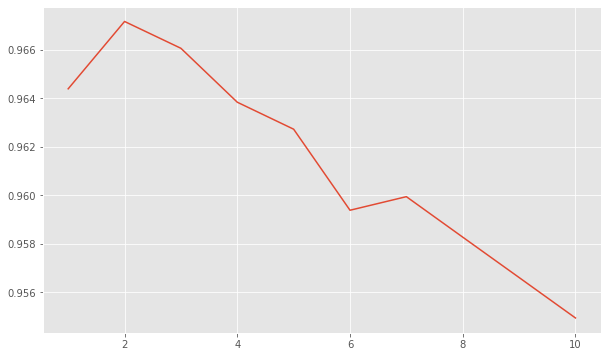

In [18]:
Cs = np.linspace(1,10,10, dtype=int)
Accuracies = np.zeros(Cs.shape[0])
for i,k in enumerate(Cs): 
    digit_clf = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator = digit_clf, X = X, y = y, cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

It looks like KNN performs the best when k= 3,4 or 6 (why is 5 not a good number for this?)

For the scaled data, I ran the above cells in a similar fashion to SVM. Surprisingly, my accuracy improves roughly 2% compared to scaled data and when k=2 using unscaled data, the accuracy was over 96.6%

Part 2.1

In [19]:
OnlineNewsData = pd.read_csv("OnlineNewsPopularity.csv")
OnlineNewsData.drop(columns=['url', ' timedelta'], axis=1, inplace=True)

In [20]:
shares = OnlineNewsData[" shares"].to_numpy()

In [21]:
XData = OnlineNewsData.drop(columns=[' shares'], axis=1)
display(XData)

,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,...,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity
0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,...,0.378636,0.100000,0.70,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500
1,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,...,0.286915,0.033333,0.70,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000
2,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,...,0.495833,0.100000,1.00,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000
3,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,...,0.385965,0.136364,0.80,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000
4,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,...,0.411127,0.033333,1.00,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
39639,11.0,346.0,0.529052,1.0,0.684783,9.0,7.0,1.0,1.0,4.523121,...,0.333791,0.100000,0.75,-0.260000,-0.500,-0.125000,0.100000,0.000000,0.400000,0.000000
39640,12.0,328.0,0.696296,1.0,0.885057,9.0,7.0,3.0,48.0,4.405488,...,0.374825,0.136364,0.70,-0.211111,-0.400,-0.100000,0.300000,1.000000,0.200000,1.000000
39641,10.0,442.0,0.516355,1.0,0.644128,24.0,1.0,12.0,1.0,5.076923,...,0.307273,0.136364,0.50,-0.356439,-0.800,-0.166667,0.454545,0.136364,0.045455,0.136364
39642,6.0,682.0,0.539493,1.0,0.692661,10.0,1.0,1.0,0.0,4.975073,...,0.236851,0.062500,0.50,-0.205246,-0.500,-0.012500,0.000000,0.000000,0.500000,0.000000


In [22]:
X = scale(XData.to_numpy())

In [23]:
medianShares = np.median(shares)
maxShares = np.amax(shares)
minShares = np.amin(shares)

In [24]:
arr = []
for share in shares:
    if share > medianShares:
        arr.append(1)
    else:
        arr.append(0)
y = np.array(arr)

In [25]:
print(y)

[0 0 1 ... 1 0 0]


Part 2.2

In [26]:
print("Min shares: ", minShares)
print("Max shares: ", maxShares)
print("Median shares: ", medianShares)

Min shares:  1
Max shares:  843300
Median shares:  1400.0


These values seem reasonable, although I am somewhat surprised that the min shares is 1 instead of 0

Part 2.3

In [27]:
xTrain, xTest, yTrain, yTest = train_test_split(X, y, random_state=1, test_size=0.8)

In [28]:
k = 10
knnModel = KNeighborsClassifier(n_neighbors=k)
knnModel.fit(xTrain, yTrain)

KNeighborsClassifier(n_neighbors=10)

In [29]:
print("Confusion matrix:")
yPredKNN = knnModel.predict(xTest)
print(metrics.confusion_matrix(y_true = yTest, y_pred = yPredKNN))

print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = yPredKNN))

Confusion matrix:
[[11996  3975]
 [ 8636  7109]]
Accuracy =  0.6023773489721276


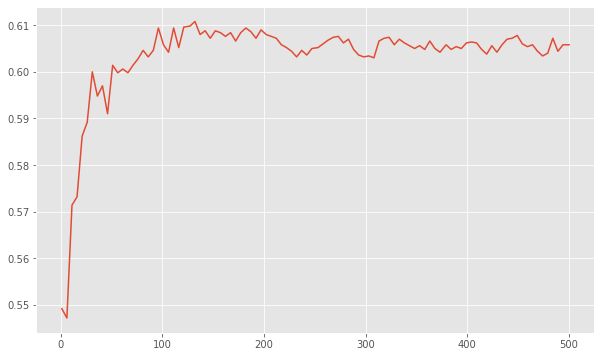

In [30]:
Cs = np.linspace(1,500,100, dtype=int)
Accuracies = np.zeros(Cs.shape[0])
for i,k in enumerate(Cs): 
    knnModel = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(estimator = knnModel, X = X[:5000], y = y[:5000], cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

Part 2.4

In [31]:
onlineNews_svm = svm.SVC(kernel='rbf', gamma='auto', C=100)
onlineNews_svm.fit(xTrain, yTrain)

SVC(C=100, gamma='auto')

In [32]:
y_predSVM = onlineNews_svm.predict(xTest)
print('Confusion Matrix')
print(metrics.confusion_matrix(y_true = yTest, y_pred = y_predSVM))
print('Accuracy = ', metrics.accuracy_score(y_true = yTest, y_pred = y_predSVM))

Confusion Matrix
[[9658 6313]
 [6686 9059]]
Accuracy =  0.5901437760121074


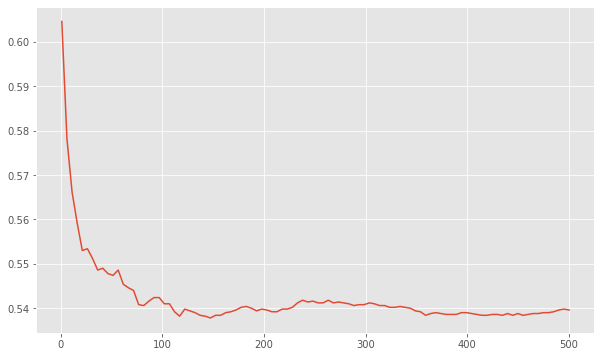

In [33]:
onlineNews_svm.get_params()

Cs = np.linspace(1,500,100)
Accuracies = np.zeros(Cs.shape[0])
for i,C in enumerate(Cs): 
    onlineNews_svm = svm.SVC(kernel='rbf',gamma='scale', C = C)
    scores = cross_val_score(estimator = onlineNews_svm, X = X[:5000], y = y[:5000], cv=5, scoring='accuracy')    
    Accuracies[i]  = scores.mean()
        
plt.plot(Cs,Accuracies)
plt.show()

Part 2.5 

Accuracy on training data=  0.6313067608476287
Accuracy on test data=  0.6250788245680413


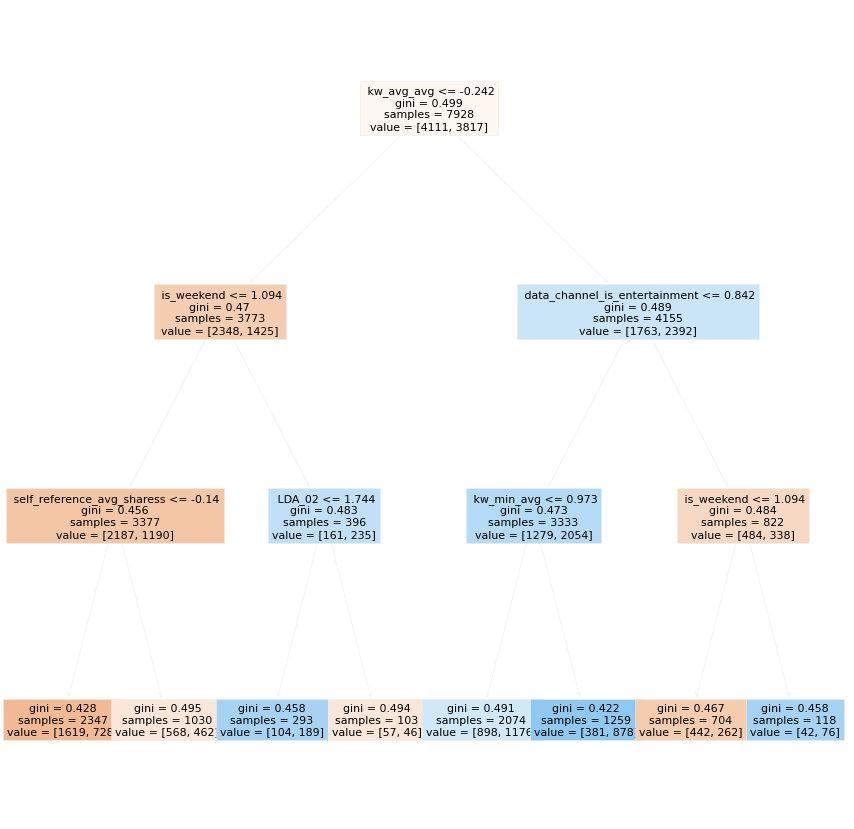

In [34]:
all_features = list(XData.columns)
decisionTree = tree.DecisionTreeClassifier(max_depth=3)

decisionTree = decisionTree.fit(xTrain, yTrain)

y_pred_train = decisionTree.predict(xTrain)
print('Accuracy on training data= ', metrics.accuracy_score(y_true = yTrain, y_pred = y_pred_train))

y_pred = decisionTree.predict(xTest)
print('Accuracy on test data= ', metrics.accuracy_score(y_true = yTest, y_pred = y_pred))
fig, ax = plt.subplots(figsize=(15, 15))
tree.plot_tree(decisionTree, filled=True, feature_names=all_features, fontsize=11);

Part 2.6
1) The decision tree seemed to have the best accuracy for this dataset at slightly above 60% accuracy.
2) Scaling X (the data) improved accuracy between both the training and the testing data. Another parameter that influenced accuracy was k for the KNN model. It had the most accuracy when k was in the 90s and with diminishing returns computationally when it was above that threshold.
3) Ease of interpretation is a rather subjective measure. In this case, the decision tree is most useful not only because of its accuracy compared to SVM or KNN, but also in terms of displaying what criteria are most important for being considered "popular"
4) Based on the results from the decision tree, the most significant indicator of popularity is kw_avg_avg (<= -0.242). The next big deciding factor is if the news article was published on the weekend, it was less likely to be popular. Additionally, if it was flagged as "entertainment" it was more likely to be popular. Other categories such as LDA influenced popularity, if the aritcle contained references to other popular articles it was less likely to become popular, and also the minimum keywords based on average shares was another indicator.